In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(67)
points = np.random.uniform(size=(20, 2), low=-1, high=1)
positive = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] >= 0)]
negative = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] < 0)]
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

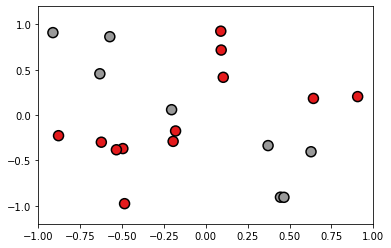

In [ ]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [ ]:
class DesicionTree():
    def __init__(self, max_lel=3):
      self.max_lvl = max_lel
      self.c = []


    def information_gain(self, X, y, feature_id, condition, criterion='entropy'):
        index1 = X[:,feature_id] < condition
        index2 = X[:,feature_id] >= condition
        if len(y[index1]) == 0:
          p1 = 0
        else:
          p1 = y[index1].sum() / len(y[index1])
        if len(y[index2]) == 0:
          p2 = 0
        else:
          p2 = y[index2].sum() / len(y[index2])

        if criterion == 'entropy':
          p = y.sum() / len(y)
          if p == 0 or p == 1:
            S = 0
          else:
            S = -(p * math.log2(p) + (1 - p) * math.log2(1 - p))
          if p1 == 0 or p1 == 1:
            S1 = 0
          else:
            S1 = -(p1 * math.log2(p1) + (1 - p1) * math.log2(1 - p1))
          if p2 == 0 or p2 == 1:
            S2 = 0
          else:
            S2 = -(p2 * math.log2(p2) + (1 - p2) * math.log2(1 - p2))
          return (len(y[index1]) * S1 + len(y[index2]) * S2) / len(y)
        elif criterion == "ginny":
          return (len(y[index1])*(1 - p1**2 - (1 - p1)**2) + len(y[index2]) * (1 - p2**2 - (1 - p2)**2)) / len(y)

    def get_conditions(self, X, y):
        a = {} 
        index = np.argsort(X[:,0])
        b = []
        for i in range(len(y[index]) - 1):
          if y[index][i] + y[index][i + 1] == 1:
            b.append((X[index][:,0][i] + X[index][:,0][i + 1]) / 2)
        a[0] = b
        index = np.argsort(X[:,1])
        b = []
        for i in range(len(y[index]) - 1):
          if y[index][i] + y[index][i + 1] == 1:
            b.append((X[index][:,1][i] + X[index][:,1][i + 1]) / 2)
        a[1] = b
        return a

    def cond(self, X, y):
        b = {}
        a = self.get_conditions(X, y)
        for i in a:
          b[i] = np.argmin(np.array([self.information_gain(X, y, i, j, 'ginny') for j in a[i]]))
        b[0]
        if self.information_gain(X, y, 0, a[0][b[0]], 'ginny') > self.information_gain(X, y, 1, a[1][b[1]], 'ginny'):
          return [1, a[1][b[1]]]
        else:
          return [0, a[0][b[0]]]
    
    def decision_tree_step(self, X, y, depth=0):
      if depth == self.max_lvl:
        return {'target' : y.mean()}
      try:
        condition = self.cond(X, y)
        self.c.append(condition)
        left_index = X[:,condition[0]] < condition[1]
        right_index = X[:,condition[0]] >= condition[1]
        

        return { 
            'level' : depth,
            'split' :  condition,
            'target' : y.mean(),
            'left_node' : self.decision_tree_step(X[left_index], y[left_index], depth + 1),
            'right_node' : self.decision_tree_step(X[right_index], y[right_index], depth + 1)
        }
      except:
        return {'target' : y.mean()}

    def fit(self, X, y):
      self.tree = self.decision_tree_step(X, y)
      return self.tree

    def predict_proba_one(self, x):
      next = self.tree
      while 'split' in next:
        if x[next['split'][0]] >= next['split'][1]:
          next = next['right_node']
        else:
          next = next['left_node']
    
      return next['target']
      
    def predict_proba(self, X):
      return [self.predict_proba_one(i) for i in X]

    def predict(self, X, porog):
      return np.array(np.array(self.predict_proba(X)) > porog, dtype=int)

In [ ]:
Tree = DesicionTree()
tree = Tree.fit(train_data, train_labels)

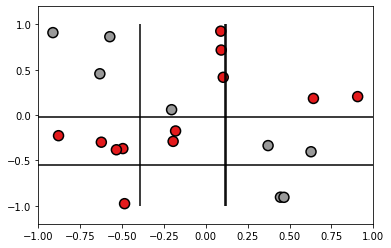

In [ ]:
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)

for i in Tree.c:
  if i[0] == 1:
    plt.vlines(i[1], -1, 1)
  else:
    plt.hlines(i[1], -1, 1)

plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [ ]:
np.random.seed(34)
points_test = np.random.uniform(size=(20, 2), low=-1, high=1)
positive_test = points[np.logical_xor(points_test[:, 0] >= 0, points_test[:, 1] >= 0)]
negative_test = points[np.logical_xor(points_test[:, 0] >= 0, points_test[:, 1] < 0)]
X_test = np.vstack([positive_test, negative_test])
y_test = np.hstack([np.ones(positive_test.shape[0]), np.zeros(negative_test.shape[0])])

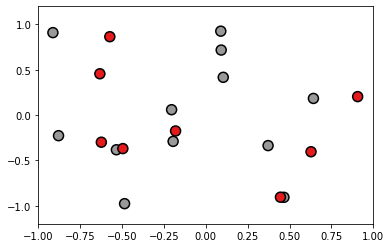

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=y_test, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [ ]:
predict = Tree.predict_proba(X_test)
np.array(predict)

array([0.        , 0.33333333, 0.        , 0.        , 0.        ,
       1.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
       0.        , 1.        , 1.        , 1.        , 0.33333333,
       0.        , 0.33333333, 0.        , 1.        , 1.        ])

In [ ]:
print(Tree.predict(X_test, 0.5))
print(y_test)

[0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
